<a href="https://colab.research.google.com/github/id-shiv/knowledge_base/blob/master/%5BProject_107%5D_Topic_Modelling_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Modelling
Reference: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [47]:
import pandas as pd
import re

# Data

In [48]:
documents = [
             "[security] validate the XSS attacks",
             "[nft] verify the performance of operating system deployment",
             "Perform user access tests",
             "verify hacker inject of SQL"
]

In [49]:
raw_text = """The goal of this testing is to satisfy users and it mainly concentrates on the following parameters of a system:

The effectiveness of the system

Is the system is easy to learn?
Is the system useful and adds value to the target audience?
Are Content, Color, Icons, Images used are aesthetically pleasing?
Efficiency

Little navigation should be required to reach the desired screen or webpage, and scrollbars should be used infrequently.
Uniformity in the format of screen/pages in your application/website.
Option to search within your software application or website.
Accuracy

No outdated or incorrect data like contact information/address should be present.
No broken links should be present.
User Friendliness

Controls used should be self-explanatory and must not require training to operate
Help should be provided for the users to understand the application/website
Alignment with the above goals helps in effective usability testing
How to do Usability Testing: Complete Process
Usability testing process consists of the following phases

Usability Testing Tutorial: Need, Process, Best Practice

Planning:-  During this phase the goals of usability test are determined. Having volunteers sit in front of your application and recording their actions is not a goal. You need to determine critical functionalities and objectives of the system. You need to assign tasks to your testers, which exercise these critical functionalities. During this phase, the usability testing method, number & demographics of usability testers, test report formats are also determined

Recruiting: During this phase, you recruit the desired number of testers as per your usability test plan. Finding testers who match your demographic (age, sex etc.) and professional ( education, job etc.) profile can take time.

Usability Testing: During this phase, usability tests are actually executed.

Data Analysis: Data from usability tests is thoroughly analyzed to derive meaningful inferences and give actionable recommendations to improve the overall usability of your product.

Reporting: Findings of the usability test is shared with all concerned stakeholders which can include designer, developer, client, and CEO

Methods of Usability Testing: 2 Techniques
There are two methods available to do usability testing -

Laboratory Usability Testing
Remote Usability Testing
Laboratory Usability Testing:. This testing is conducted in a separate lab room in presence of the observers. The testers are assigned tasks to execute. The role of the observer is to monitor the behavior of the testers and report the outcome of testing. The observer remains silent during the course of testing.  In this testing, both observers and testers are present in a same physical location.

Remote Usability Testing: Under this testing observers and testers are remotely located. Testers access the System Under Test, remotely and perform assigned tasks. Tester's voice , screen activity , testers facial expressions are recorded by an automated software. Observers analyze this data and report findings of the test. Example of such a software - http://silverbackapp.com/


How many users do you need ?
Usability Testing Tutorial: Need, Process, Best Practice

Research (Virzi, 1992 and Neilsen Landauer, 1993) indicates that 5 users are enough to uncover 80% of usability problems. Some researchers suggest other numbers.

The truth is , the actual number of the user required depends on the complexity of the given application and your usability goals. Increase in usability participants results into increased cost , planning , participant management and data analysis.

But as a general guideline, if you on a small budget and interested in DIY usability testing 5 is a good number to start with. If budget is not a constraint its best consult experienced professionals to determine the number of users.

UX Testing Checklist
The primary goal of this testing is to find crucial usability problems before the product is launched. Following things have to be considered to make a testing success:

Start the UX testing during the early stage of design and development
It's a good practice to conduct usability testing on your competitor's product before you begin development. This will help you determine usability standards for your target audience 
Select the appropriate users to test the system(Can be experts/non-experts users/50-50 of Experts and Non-Experts users)
Use a bandwidth shaper . For instance , your target audience has poor network connectivity , limit network bandwidth to say 56 Kbps for your usability testers. 
Testers need to concentrate on  critical  & frequently used functionalities of the system.
Assign a single observer to each tester. This helps observer to accurately note tester's behavior. If an observer is assigned to multiple testers, results may be compromised
Educate Designers and Developers that this testing outcomes is not a sign of failure but it's a sign of Improvement
Usability Testing Advantages
As with anything in life, usability testing has its merits and de-merits. Let's look at them

It helps uncover usability issues before the product is marketed.
It helps improve end-user satisfaction
It makes your system highly effective and efficient
It helps gather true feedback from your target audience who actually use your system during a usability test. You do not need to rely on "opinions" from random people.
Usability Testing Disadvantages
Cost is a major consideration in usability testing. It takes lots of resources to set up a Usability Test Lab. Recruiting and management of usability testers can also be expensive
However, these costs pay themselves up in form of higher customer satisfaction, retention and repeat business. Usability testing is therefore highly recommended.

"""

In [50]:
documents = raw_text.split('\n')
documents = [document.strip() for document in documents if len(document) > 1]
documents

['The goal of this testing is to satisfy users and it mainly concentrates on the following parameters of a system:',
 'The effectiveness of the system',
 'Is the system is easy to learn?',
 'Is the system useful and adds value to the target audience?',
 'Are Content, Color, Icons, Images used are aesthetically pleasing?',
 'Efficiency',
 'Little navigation should be required to reach the desired screen or webpage, and scrollbars should be used infrequently.',
 'Uniformity in the format of screen/pages in your application/website.',
 'Option to search within your software application or website.',
 'Accuracy',
 'No outdated or incorrect data like contact information/address should be present.',
 'No broken links should be present.',
 'User Friendliness',
 'Controls used should be self-explanatory and must not require training to operate',
 'Help should be provided for the users to understand the application/website',
 'Alignment with the above goals helps in effective usability testing'

In [51]:
df = pd.DataFrame(documents, columns=['documents'])

In [52]:
df.head()

,documents
0,The goal of this testing is to satisfy users a...
1,The effectiveness of the system
2,Is the system is easy to learn?
3,Is the system useful and adds value to the tar...
4,"Are Content, Color, Icons, Images used are aes..."


# Cleaning

In [53]:
# remove punctuations
df['documents'] = df['documents'].map(lambda x: re.sub('[,\.!?]', '', x))

<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<input>:2: DeprecationWarning: invalid escape sequence \.
<ipython-input-53-9a9e2d482169>:2: DeprecationWarning: invalid escape sequence \.
  df['documents'] = df['documents'].map(lambda x: re.sub('[,\.!?]', '', x))


In [54]:
# convert to lowercase
df['documents'] = df['documents'].map(lambda x: x.lower())

In [55]:
df['documents']

0     the goal of this testing is to satisfy users a...
1                       the effectiveness of the system
2                        is the system is easy to learn
3     is the system useful and adds value to the tar...
4     are content color icons images used are aesthe...
5                                            efficiency
6     little navigation should be required to reach ...
7     uniformity in the format of screen/pages in yo...
8     option to search within your software applicat...
9                                              accuracy
10    no outdated or incorrect data like contact inf...
11                    no broken links should be present
12                                    user friendliness
13    controls used should be self-explanatory and m...
14    help should be provided for the users to under...
15    alignment with the above goals helps in effect...
16        how to do usability testing: complete process
17    usability testing process consists of the 

# EDA

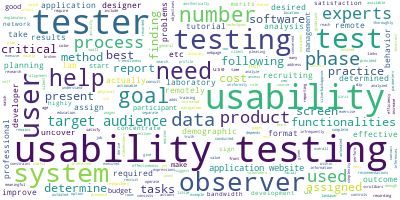

In [56]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['documents'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# Prepare Data

Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.


In [57]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df.documents.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['goal', 'testing', 'satisfy', 'users', 'mainly', 'concentrates', 'following', 'parameters', 'system']


In [58]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


# LDA model training

To keep things simple, we’ll keep all the parameters to default except for inputting the number of topics. For this tutorial, we will build a model with 10 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic.

In [59]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.048*"experts" + 0.041*"users" + 0.039*"system" + 0.026*"non" + '
  '0.025*"target" + 0.025*"value" + 0.025*"audience" + 0.025*"adds" + '
  '0.025*"useful" + 0.017*"appropriate"'),
 (1,
  '0.027*"testing" + 0.027*"system" + 0.027*"users" + 0.027*"parameters" + '
  '0.027*"satisfy" + 0.027*"concentrates" + 0.027*"goal" + 0.027*"following" + '
  '0.027*"mainly" + 0.027*"user"'),
 (2,
  '0.053*"usability" + 0.036*"testing" + 0.036*"effective" + 0.036*"system" + '
  '0.019*"test" + 0.019*"designer" + 0.019*"client" + 0.019*"developer" + '
  '0.019*"findings" + 0.019*"shared"'),
 (3,
  '0.042*"testing" + 0.028*"merits" + 0.028*"need" + 0.028*"ux" + '
  '0.017*"testers" + 0.016*"system" + 0.015*"data" + 0.015*"usability" + '
  '0.015*"used" + 0.015*"de"'),
 (4,
  '0.070*"usability" + 0.066*"testing" + 0.027*"data" + 0.021*"product" + '
  '0.020*"testers" + 0.017*"remote" + 0.014*"software" + 0.012*"test" + '
  '0.011*"remotely" + 0.011*"observers"'),
 (5,
  '0.062*"testing" + 0.036*

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

# Analyzing LDA model results

Now that we have a trained model let’s visualize the topics for interpretability. To do so, we’ll use a popular visualization package, pyLDAvis which is designed to help interactively with:
Better understanding and interpreting individual topics, and
Better understanding the relationships between the topics.
For (1), you can manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic.
For (2), exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics.


In [60]:
! pip install pyldavis

In [61]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))

# this is a bit time consuming - make the if statement True
# if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.105476  0.096908       1        1  17.790283
6     -0.095806 -0.119978       2        1  16.034271
7     -0.069782 -0.041531       3        1  14.570162
4      0.040728 -0.028016       4        1  14.435418
5      0.147711 -0.029082       5        1  11.883069
3      0.024313  0.032457       6        1   7.869780
2     -0.004435  0.054598       7        1   5.385107
9      0.022037 -0.020618       8        1   5.286589
0      0.023280  0.035844       9        1   4.108103
1      0.017431  0.019418      10        1   2.637218, topic_info=              Term       Freq      Total Category  logprob  loglift
6           system   6.000000   6.000000  Default  30.0000  30.0000
8            users   5.000000   5.000000  Default  29.0000  29.0000
157       observer   3.000000   3.000000  Default  28.0000  28.0000
236        experts   2.000000   2.000000  Default  27.0000  27.0000
70       usability  26.000000  26.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
284  disadvantages   0.033783   1.272497  Topic10  -6.0233   0.0067
143        methods   0.033783   2.110565  Topic10  -6.0233  -0.4993
51         present   0.033783   2.154170  Topic10  -6.0233  -0.5198
181           many   0.033783   1.146447  Topic10  -6.0233   0.1110
218             ux   0.033783   1.698598  Topic10  -6.0233  -0.2822

[452 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
43        5  0.861907    accuracy
121       4  0.743747  actionable
79        3  0.718993     actions
168       4  0.780854    activity
118       1  0.490547    actually
...     ...       ...         ...
192       5  0.861912       virzi
101       3  0.715512  volunteers
38        1  0.383958     website
38        2  0.383958     website
38        5  0.383958     website

[340 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 8, 5, 6, 4, 3, 10, 1, 2])